## Effects of Hotspots and Radial Cuts

* Hotspots can completely obscure delayed backgrounds, especially for position-uncorrelated backgrounds
* Some RQs have definitions which need refining, namely child_dr_cm since we allow child_dr_cm <= 50 but also allow progenitors with r < 55
  * Consequently some progenitors closer to the wall can have their symmetry broken for child_dr_cm >= 30 which would be outside the TPC

In [1]:
import importlib
import warnings

import awkward as ak
import etrainregions
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from etrain.dataprocess import get_etrains
from etrain.plots import Ylabels, plot_cfg, plot_fit, plot_hgrid, plot_stack
from etrain.utils.axes import CustomRegular, HistAxes
from etrainregions import Fits, prog_DdV_cat, prog_EdV_cat
from matplotlib.colors import LogNorm

warnings.filterwarnings("ignore")
importlib.reload(etrainregions)
matplotlib_inline.backend_inline.set_matplotlib_formats(
    "png"
)  # skip svg since 2d plots use a lot of space
plot_cfg["watermark_text"] = ""

In [2]:
# filepath = "/global/cfs/cdirs/lz/users/emiz/sv_SEDecayTime_CFS/BigDEB_4.0_lr_EdV_7_8_9_DdV_16_28_35"
filepath = "/home/emiz/projects/projectdata/sv_SEdecaytime/BigDEB_4.0_lr_EdV_7_8_9_DdV_16_28_35"

prog_cols = [
    "prog_runID",
    "prog_eventID",
    "prog_eventTTS_s",
    "prog_x_cm",
    "prog_y_cm",
    "prog_r_cm",
    "prog_tpc_region",
    "prog_drift_time_ms",
    "prog_e_lifetime_ms",
    "prog_area_se_r",
    "prog_area_se_s",
    "prog_area_se_i",
    "prog_EdV",
    "prog_DdV",
    "prog_CHV_VOUT",
    "prog_GHV_VOUT",
    "prog_AHV_VOUT",
    "log_lt",
]
prog_names = [br_name for br_name in prog_cols if "prog_" in br_name]
h_counts_cols = [
    "child_dt_s",
    "child_dr_cm",
    "child_dr_weight",
    "child_x_cm",
    "child_y_cm",
    "child_r_cm",
    "child_classification",
    "child_pcorr",
] + prog_names

data = (
    get_etrains(
        filepath,
        prog_columns=prog_cols,
        child_columns=h_counts_cols,
    )
).child_filter("child_classification", "eq", 0)
data.set_categorical_axis(cat_axis=prog_EdV_cat)
data.set_categorical_axis(cat_axis=prog_DdV_cat)

In [3]:
voltage_combos = np.unique(
    ak.zip(
        (
            data.prog_pulses.prog_AHV_VOUT,
            data.prog_pulses.prog_GHV_VOUT,
            data.prog_pulses.prog_CHV_VOUT,
        )
    )
)

In [4]:
[*zip(voltage_combos["0"], voltage_combos["1"], voltage_combos["2"])]

[(3.5, 3.5, 32.1),
 (4.0, 4.0, 20.1),
 (4.0, 4.0, 32.1),
 (4.0, 4.0, 39.1),
 (4.5, 4.5, 32.1)]

In [5]:
dV_combos = np.unique(ak.zip((data.prog_pulses.prog_EdV, data.prog_pulses.prog_DdV)))

In [6]:
# | label: dq-voltage-combos
# Used in child slides

[*zip(dV_combos["0"], dV_combos["1"])]

[(7.0, 28.6), (8.0, 16.1), (8.0, 28.1), (8.0, 35.1), (9.0, 27.6)]

In [7]:
# Run list
runs_df = ak.to_dataframe(
    data.prog_pulses[["prog_runID", "prog_EdV", "prog_DdV"]]
).drop_duplicates(subset="prog_runID")
runs_df.sort_values(by="prog_runID", inplace=True)

In [8]:
"https://codereview.stackexchange.com/questions/262797/find-all-subranges-of-consecutive-values-in-an-array"


def get_intervals(data):
    intervals = np.split(data, np.where(np.diff(data) > 1)[0] + 1)
    pairs = [(interval[0], interval[-1]) for interval in intervals]
    return [
        interval[0] if interval[0] == interval[1] else (interval[0], interval[1])
        for interval in pairs
    ]


get_intervals(runs_df["prog_runID"].to_numpy())

[(6682, 6719),
 6721,
 (6726, 6734),
 (6736, 6748),
 (6750, 6762),
 (8959, 8961),
 (8964, 8966),
 8972,
 (8974, 8976),
 (8979, 8981),
 (8984, 8986),
 (8989, 8992),
 (8996, 8997),
 (9174, 9175),
 (9178, 9180),
 (9183, 9185),
 (9188, 9191),
 (9194, 9196),
 (9199, 9201),
 9204,
 (9206, 9209),
 (9211, 9213),
 (9216, 9218),
 (9370, 9371),
 (9375, 9378),
 (9383, 9385),
 (9388, 9390),
 (9393, 9395),
 (9496, 9498),
 (9501, 9503),
 (9510, 9511),
 (9516, 9518),
 (9521, 9523),
 (9530, 9532),
 (9535, 9537),
 (9541, 9543),
 (9546, 9547),
 9549,
 (9553, 9555),
 9558,
 9570,
 (9574, 9576),
 (9579, 9581),
 (9584, 9586),
 (9589, 9591),
 9595,
 9597,
 (9600, 9602),
 (9605, 9606),
 9608,
 (9611, 9613)]

In [9]:
# | label: ext-study-runs
# | output: asis

# need print to format newlines correctly
print(
    runs_df.groupby(["prog_EdV", "prog_DdV"])["prog_runID"]
    .apply(lambda x: get_intervals(x.to_numpy()))
    .to_markdown(headers=["Extraction $\Delta V$, Drift $\Delta V$ [kV]", "Runs"])
)

| Extraction $\Delta V$, Drift $\Delta V$ [kV]   | Runs                                                                                                                                                                                                                                 |
|:-----------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| (7.0, 28.6)                                    | [(9174, 9175), (9178, 9180), (9183, 9185), (9188, 9191), (9194, 9196), (9199, 9201), 9204, (9206, 9209), (9211, 9213), (9216, 9218)]                                                                                                 |
| (8.0, 16.1)                                    | [(8959, 8961), (8964, 8966), 8972, (8974, 8976), (8979, 8981), (8984, 8986), (8989, 8992), (8996, 8997)

## Position Correlation Check

In [10]:
# | label: dq-pcorr-rate-check

h_counts = data.get_counts_hist(
    [
        "child_dt_log_s",
        "prog_tpc_region",
        "child_dr_cm",
        "prog_DdV_cat",
        "prog_EdV_cat",
    ],
    "child",
    weight=data.child_pulses.child_dr_weight / (data.child_pulses.prog_area_se_s),
)

h_lt = data.get_nd_lt_hist(
    ["prog_tpc_region", "prog_DdV_cat", "prog_EdV_cat"], lt_type="log"
)

grid_axis = "prog_tpc_region"

stack_edges = data.get_axis(grid_axis).get_cat_labels()
stacks = []
for label in stack_edges:
    stack = data.make_rate_stack(
        h_counts,
        h_lt,
        "child_dt_log_s",
        "child_dr_cm",
        cut_dict=dict(prog_tpc_region=label, prog_DdV_cat="28", prog_EdV_cat="7"),
        slice_x=slice(None, None, 2j),
    )
    stack.name = f"{data.get_axis(grid_axis).label}: {stack.cuts_applied.pop(data.get_axis(grid_axis).label)}"
    stacks.append(stack)

fig, axes = plot_hgrid(
    stacks,
    supylabel=Ylabels().get_label(["rate", "child_dr_cm", "prog_area_se_s"]),
    ylim=(1e-7, 2e-1),
)

## Hotspot Check

In [11]:
cat_combos = [("7", "28"), ("8", "16"), ("8", "28"), ("8", "35"), ("9", "28")]

h_counts = data.get_counts_hist(
    ["child_dt_log_s", "child_x_cm", "child_y_cm", "prog_EdV_cat", "prog_DdV_cat"],
    "child",
)

h_lt = data.get_nd_lt_hist(["prog_EdV_cat", "prog_DdV_cat"], lt_type="log")

In [12]:
h_rate_list = []
project = ("child_x_cm", "child_y_cm")

for combo in cat_combos:
    cut_dict = dict(prog_EdV_cat=combo[0], prog_DdV_cat=combo[1])

    h_rate_list.append(
        h_counts.get_sliced_projection(project, cut_dict)
        / h_lt.get_sliced_projection(project, cut_dict)
    )

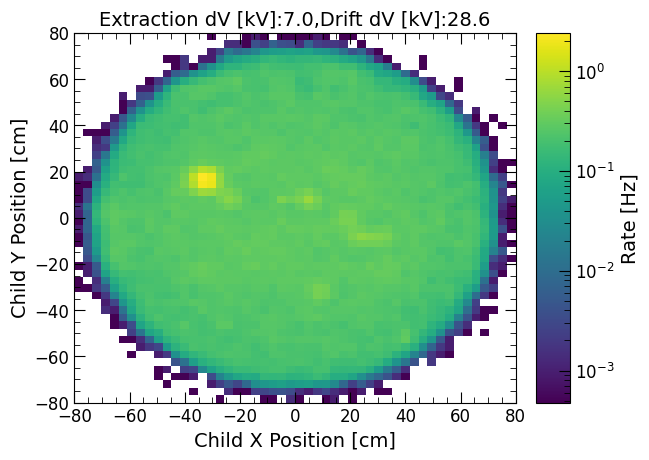

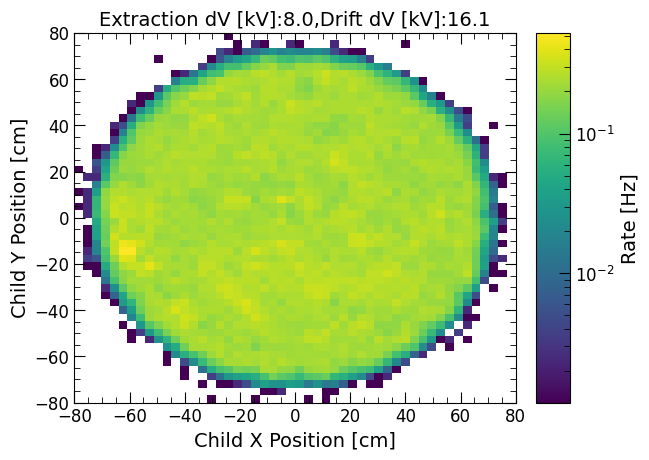

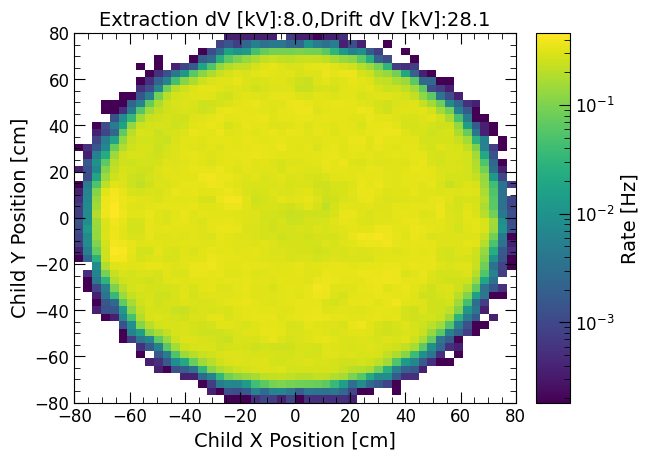

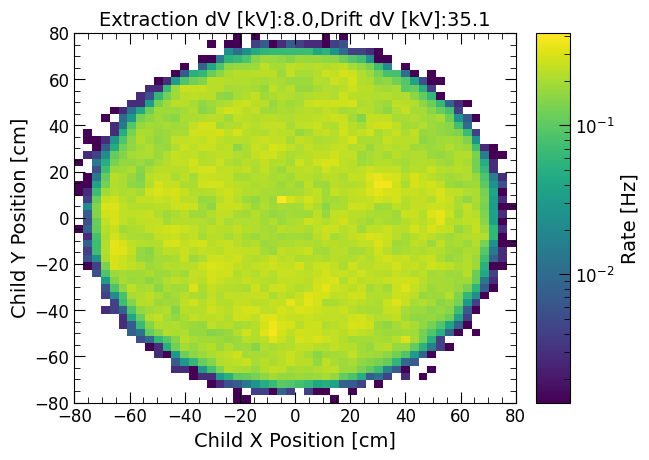

In [13]:
h_hotspot = h_rate_list[-1]
for h_rate, EdV, DdV in zip(h_rate_list, dV_combos["0"], dV_combos["1"]):
    fig, ax = plt.subplots()
    h_rate.plot2d(ax=ax, flow=None, norm=LogNorm())
    fig.axes[0].set(
        title=f"{data.axes.prog_EdV.label}:{EdV},{data.axes.prog_DdV.label}:{DdV}"
    )
    fig.axes[1].set(ylabel=Ylabels().get_label(["rate"]))

* Hotspots are worst in 9kV dataset
* 7kV Dataset has some hotspots too

### Try Isolating Hotspot

In [14]:
prog_eventTTS_s = CustomRegular(
    bins=1000,
    start=np.min(data.prog_filter("prog_EdV", "eq", 7).prog_pulses.prog_eventTTS_s),
    stop=np.max(data.prog_filter("prog_EdV", "eq", 7).prog_pulses.prog_eventTTS_s),
    name="prog_eventTTS_s",
    label="Progenitor Event Timestamp [s]",
    stack_slice=slice(None, None, 250j),
)

In [15]:
h_counts = data.get_counts_hist(
    ["child_x_cm", "child_y_cm", prog_eventTTS_s, "prog_EdV_cat"]
)
h_lt = data.get_nd_lt_hist([prog_eventTTS_s, "prog_EdV_cat"], lt_type="log")

In [16]:
y_label = Ylabels().get_label(["rate"])
child_cut = {
    "child_x_cm": slice(-35j, -25j, sum),
    "child_y_cm": slice(15j, 25j, sum),
}
prog_cut = {
    "prog_EdV_cat": 0,
    "prog_eventTTS_s": slice(None, None, 2j),
}
lt_cut = {"child_dt_s": slice(None, None, sum)}

h_rate = h_counts[(child_cut | prog_cut)] / h_lt[(lt_cut | prog_cut)].view()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set(yscale="log", ylim=(1e-2, 3e3), ylabel=y_label, title="Hotspot")
h_rate.plot(ax=ax, flow=None)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9ff46b6dd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

* Rate at hotspot seems at least 10x higher compared to center of TPC at almost all timescales
* Probably not worth trying to create a time-based veto

In [17]:
child_cut = {
    "child_x_cm": slice(-5j, 5j, sum),
    "child_y_cm": slice(40j, 50j, sum),
}
prog_cut = {
    "prog_EdV_cat": 0,
    "prog_eventTTS_s": slice(None, None, 2j),
}
lt_cut = {"child_dt_s": slice(None, None, sum)}

h_rate = h_counts[(child_cut | prog_cut)] / h_lt[(lt_cut | prog_cut)].view()
fig, ax = plt.subplots(figsize=(12, 4))
ax.set(yscale="log", ylim=(1e-2, 3e3), ylabel=y_label, title="No Hotspot")
h_rate.plot(ax=ax, flow=None)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9ff4668510>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

## The Hotspot Class

* Once we've identified hostpots in space and time, a Hotspot object could be useful for keeping track of them
  * They are localized in x and y, circular in nature, and are active over certain time intervals
* One hotspot has one x/y location and size, and is often active over many time intervals
* This could be a method on Etrains where a list of Hotspots is given and then cuts are applied for each hotspot
  * cut_hotspots would be great for chaining to making histograms and getting a rough idea of how a dataset is affected
* Assumes we want to cut on all hotspots in the same fashion which is probably true?

### Cutting Children

* Removing children is straightforward, just remove at the hotspot location when it was active (using `prog_eventTTS_s` as a proxy for time)

### Cutting Progenitors

* Removing progenitors at the hotspot location might be a good idea since removing children could seriously hamper the position correlated rates if a progenitor is co-located with a hotspot.
* If we remove progenitors based on the same criteria as children, we need the `prog_runID` and `prog_eventID` for the progenitors we removed.
  * Then we need to remove additional children with the same set of `prog_runID` and `prog_eventID`

In [18]:
from etrain.hotspots import Hotspot

hspot_list = [
    Hotspot(
        x_cm=70,
        y_cm=0,
        r_cm=10,
        active_times=[(1639775450, 1640009515)],
        desc="9EdV Accidentals",
    ),
    Hotspot(
        x_cm=-70,
        y_cm=2,
        r_cm=8,
        active_times=[(1639775450, 1640009515)],
        desc="9EdV Accidentals",
    ),
    Hotspot(
        x_cm=-66,
        y_cm=8,
        r_cm=6,
        active_times=[(1639775450, 1640009515)],
        desc="9EdV Accidentals",
    ),
    Hotspot(
        x_cm=-60,
        y_cm=-11,
        r_cm=6,
        active_times=[(1639775450, 1640009515)],
        desc="9EdV Accidentals",
    ),
    Hotspot(
        x_cm=-54,
        y_cm=-18,
        r_cm=6,
        active_times=[(1639775450, 1640009515)],
        desc="9EdV Accidentals",
    ),
    Hotspot(
        x_cm=-33,
        y_cm=16,
        r_cm=5,
        active_times=[(1658900000, 1659110000)],
        desc="7EdV Accidentals",
    ),
]

[Text(0, 0.5, 'Rate [Hz]')]

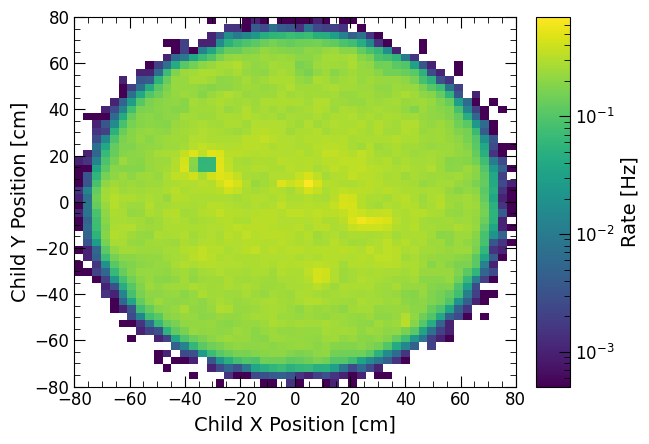

In [19]:
hspot_cut = data.veto_hotspots(hspot_list)

h_counts = hspot_cut.get_counts_hist(
    ["child_x_cm", "child_y_cm", prog_eventTTS_s, "prog_EdV_cat"]
)
h_lt = hspot_cut.get_nd_lt_hist([prog_eventTTS_s, "prog_EdV_cat"], lt_type="log")

fig, ax = plt.subplots()

h_rate = h_counts[:, :, sum, 0] / h_lt[sum, sum, 0]
h_rate.plot2d(ax=ax, flow=None, norm=LogNorm())
fig.axes[1].set(ylabel=Ylabels().get_label(["rate"]))

In [20]:
h_counts = hspot_cut.get_counts_hist(
    [
        "child_dt_log_s",
        "prog_tpc_region",
        "child_dr_cm",
        "prog_DdV_cat",
        "prog_EdV_cat",
    ],
    "child",
    weight=hspot_cut.child_pulses.child_dr_weight
    / (hspot_cut.child_pulses.prog_area_se_s),
)

h_lt = hspot_cut.get_nd_lt_hist(
    ["prog_tpc_region", "prog_DdV_cat", "prog_EdV_cat"], lt_type="log"
)

grid_axis = "prog_tpc_region"

stack_edges = data.get_axis(grid_axis).get_cat_labels()
stacks = []
for label in stack_edges:
    stack = data.make_rate_stack(
        h_counts,
        h_lt,
        "child_dt_log_s",
        "child_dr_cm",
        cut_dict=dict(prog_tpc_region=label, prog_DdV_cat="28", prog_EdV_cat="7"),
        slice_x=slice(None, None, 2j),
    )
    stack.name = f"{hspot_cut.get_axis(grid_axis).label}: {stack.cuts_applied.pop(hspot_cut.get_axis(grid_axis).label)}"
    stacks.append(stack)

fig, axes = plot_hgrid(
    stacks,
    supylabel=Ylabels().get_label(["rate", "child_dr_cm", "prog_area_se_s"]),
    ylim=(1e-7, 2e-1),
)

## Hotspot Cut on EXL Trains

In [21]:
cut_dict = dict(prog_tpc_region="EXL", prog_EdV_cat="7", prog_DdV_cat="28")
child_ax = ["child_dt_log_s", "child_pcorr"]
prog_ax = ["prog_tpc_region", "prog_EdV_cat", "prog_DdV_cat"]


def make_stack(data, weight):
    h_counts = data.get_counts_hist(
        child_ax + prog_ax,
        "child",
        weight=weight,
    )

    h_lt = data.get_nd_lt_hist(prog_ax, lt_type="log")

    stack = data.make_rate_stack(
        h_counts,
        h_lt,
        "child_pcorr",
        "child_dt_log_s",
        slice_x=slice(None, None, 4j),
        cut_dict=cut_dict,
    )

    return stack

* No cut

[Text(0.5, 1.0, 'No Hotspot Cut')]

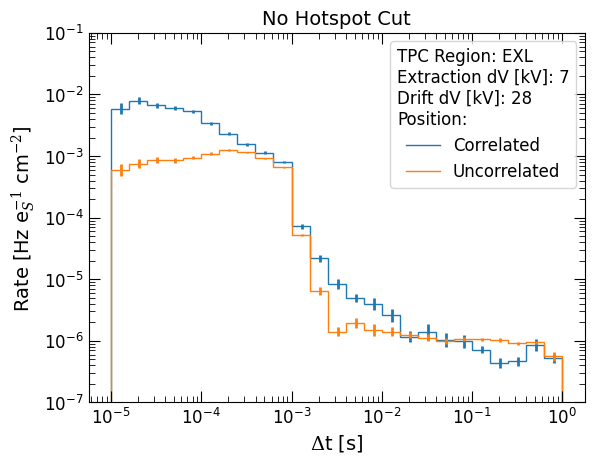

In [22]:
y_label = Ylabels().get_label(["rate", "prog_area_se_s", "child_dr_cm"])

stack = make_stack(
    data, data.child_pulses.child_dr_weight / data.child_pulses.prog_area_se_s
)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))
ax.set(title="No Hotspot Cut")

* Cuts on hotspots have strong effect on puncorr background
* These hotspots were likely present only in uncorrelated regions of a progenitor
* Two effects lower the rate:
  * Fewer electrons, obviously
  * Slightly oversized area since hotspot removal is not compensated for here

[Text(0.5, 1.0, 'Hotspot Cut')]

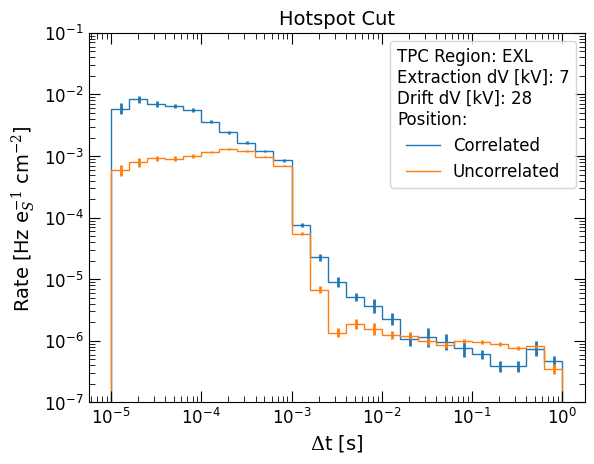

In [23]:
stack = make_stack(
    hspot_cut,
    hspot_cut.child_pulses.child_dr_weight / hspot_cut.child_pulses.prog_area_se_s,
)
fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))
ax.set(title="Hotspot Cut")

In [24]:
h_rate = stack[0].copy()
h_rate[...] = stack[0].view() - stack[1].view()
h_rate.label = stack.print_cuts_applied(keep_stack_label=False)

fit_range = slice(3e-3j, 1.7e-2j, None)
fit = Fits().fit_hist(h_rate, fit_range, "p0")

fig, ax = plot_fit(h_rate, fit, ylabel=y_label, ylim=(1e-7, 8e-2))  # fmt: skip

## Radial Cuts

* Severe rate dropoff at walls, seems like a good idea to examine effects of different radial cuts

### Cut Only on Progenitor Radius

* Progenitors outside of 55cm are already excluded
* Tightening this cut more seems to have no effect, except to lower statistics

In [25]:
data_prog_r_le45 = data.prog_filter("prog_r_cm", "le", 45)

In [26]:
stack = make_stack(data_prog_r_le45, 1 / data_prog_r_le45.child_pulses.prog_area_se_i)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))

### Cut Only on Child Radius

* Radial cut of 60cm is slightly more excessive than only targeting hotspots

In [27]:
data_child_r_cut = data.child_filter("child_r_cm", "le", 60)

In [28]:
stack = make_stack(data_child_r_cut, 1 / data_child_r_cut.child_pulses.prog_area_se_i)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))

* Radial and hotspot cut together have only sightly lower delayed uncorrelated bkg

In [29]:
hspot_cut_child_r_cut = hspot_cut.child_filter("child_r_cm", "le", 60)

In [30]:
stack = make_stack(
    hspot_cut_child_r_cut, 1 / hspot_cut_child_r_cut.child_pulses.prog_area_se_i
)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))

### Change Pcorr and Puncorr Definition

* Puncorr currently extends to a dr of 50cm but that can include some dead regions outside of the TPC
* Refining puncorr from (20,50) cm to (20,30) raises puncorr rates because:
  * The flux is inherently higher at smaller radii
  * There is almost no dead region at high dr since prog pulses have r < 55cm
* The rate increase is especially noticeable for photoionization, probably because it's most impacted by the dead regions at higher radii

In [31]:
data_child_pcorr = data
data_child_pcorr.set_categorical_axis(
    cat_axis=HistAxes().child_pcorr,  # new child_pcorr axis will overwrite previous
    cat_intervals=[(0, 10), (20, 30)],
)

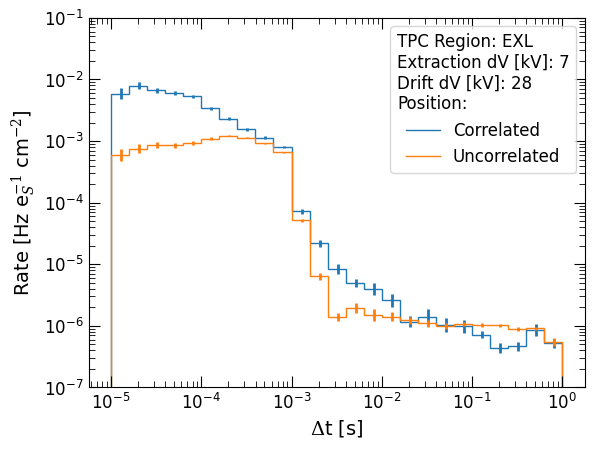

In [32]:
stack = make_stack(data_child_pcorr, 1 / data_child_pcorr.child_pulses.prog_area_se_i)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))

* Removing hotspot has big effect on delayed puncorr bkg
* Little to no effect on photoionization

In [33]:
hspot_cut_child_pcorr = hspot_cut
hspot_cut_child_pcorr.set_categorical_axis(
    cat_axis=HistAxes().child_pcorr, cat_intervals=[(0, 10), (20, 30)]
)

In [34]:
stack = make_stack(
    hspot_cut_child_pcorr, 1 / hspot_cut_child_pcorr.child_pulses.prog_area_se_i
)

fig, ax = plot_stack(stack, ylabel=y_label, ax_kwargs=dict(ylim=(1e-7, 1e-1)))

* So ideally we should bring in the puncorr radius to avoid dead regions outside of the TPC
  * This will raise rates
* Remove hotspots with spatial veto
  * This will lower rates
* End result seems to balance out a bit with closer match to photoionization and delayed background